# 1.Prediction of 'Delivery Time' using 'Sorting Time'

## 1.Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2.Import data

In [2]:
delivery_data=pd.read_csv('delivery_time.csv')
delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## 3.Data understanding, Initial analysis

In [3]:
delivery_data.shape

(21, 2)

In [4]:
delivery_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
delivery_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

## 4.Assumptions check

## 4.1 Normality test

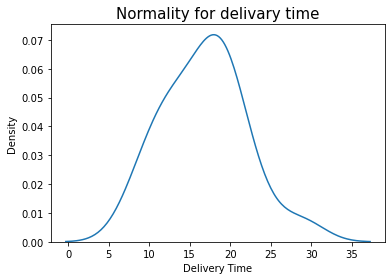

In [6]:
sns.distplot(a=delivery_data['Delivery Time'],hist=False)
plt.title('Normality for delivary time',size=15)
plt.show()

In [7]:
delivery_data['Delivery Time'].skew()

0.3523900822831107

In [8]:
delivery_data['Delivery Time'].kurt()

0.31795982942685397

### Normality test Failed

## 4.2 Linearity Test

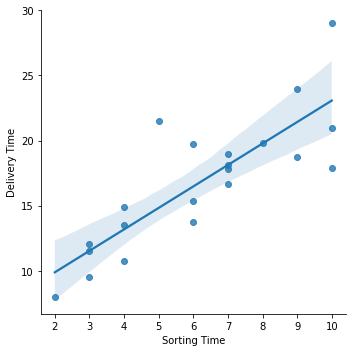

In [9]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=delivery_data)

### Linearity test Failed

## 4.3 Multicollinearity Test

### We cannot perform multi collinearity test as we have only one input, we can say that multicollinearity test is passed

## 4.4 Auto Regression Test



### We cannot perform auto regression test as the input feature we have is not time based, so it is also passed

## Feature Engineering

In [10]:
delivery_data = delivery_data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'}, axis=1)
delivery_data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## 5.Model Building , Model Training & Model Testing Using statsmodel

In [11]:
import statsmodels.formula.api as smf

In [12]:
linear_model=smf.ols(formula='delivery_time~sorting_time', data=delivery_data).fit()
linear_model

In [13]:
#Finding slope and intercept
linear_model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

## Model Testing

In [14]:
#Finding tvalues, pvalues
linear_model.tvalues, linear_model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

## Model Predictions

In [15]:
#Manual prediction for say sorting time= 5
#y=mx+c
delivery_data = 1.649020*5+6.582734
delivery_data

14.827834

In [16]:
##Automated prediction for say sorting time = 5,10
new_data = pd.DataFrame(data={'sorting_time':[5,10]})
new_data

,sorting_time
0,5
1,10


In [17]:
Delivery_time=linear_model.predict(new_data)
Delivery_time

0    14.827833
1    23.072933
dtype: float64

In [18]:
##Automated prediction for say sorting time = 12,2
new_data = pd.DataFrame(data={'sorting_time':[12,2]})
new_data

,sorting_time
0,12
1,2


In [19]:
Delivery_time=linear_model.predict(new_data)
Delivery_time

0    26.370973
1     9.880774
dtype: float64

## Model prediction is DONE

### =====================================================================================

# 2.Build a prediction model for salary Hike

## 1. Import necessary libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [21]:
salary_data=pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## 3. Data understanding,Initial analysis

In [22]:
salary_data.shape

(30, 2)

In [23]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [24]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

## 4. Assumptions Check

### 4.1 Normality Test

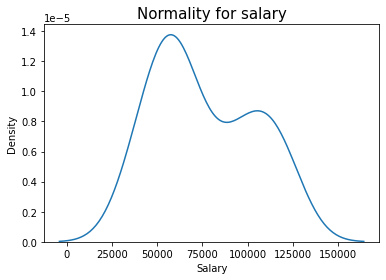

In [25]:
sns.distplot(a=salary_data['Salary'],hist= False)
plt.title('Normality for salary',size = 15)
plt.show()

In [26]:
salary_data['Salary'].skew()                    #the acceptable range for skewness is 0 to +0.5/ 0 to -0.5

0.35411967922959153

In [27]:
salary_data['Salary'].kurt()                    #the acceptable range for kurtosis is 3 to -3

-1.295421086394517

### Normality Test Failed

## 4.2 Linearity Test

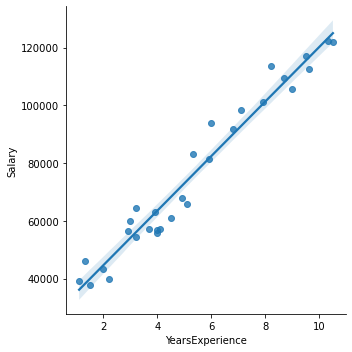

In [28]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)
plt.show()

### Almost all the points lie on straight line but there are some outliers, so Linearity Test also Failed

## 4.3 Multicollinearity Test
**We cannot perform multi collinearity test as we have only one input, we can say that multicollinearity test is passed**

## 4.4 Auto Regression Test
**We cannot perform auto regression test as the input feature we have is not time based, so it is also passed**

In [29]:
salary_data= salary_data.rename({'YearsExperience':'Experience','Salary':'salary'}, axis=1)
salary_data

,Experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## 5.Model Building , Model Training & Model Testing Using statsmodel

In [30]:
import statsmodels.formula.api as smf

In [31]:
model=smf.ols(formula='salary~Experience', data=salary_data).fit()
model

## Model Testing

In [32]:
#intercept and slope
model.params

Intercept     25792.200199
Experience     9449.962321
dtype: float64

In [33]:
#calculating t-values & p-values
model.tvalues, model.pvalues

(Intercept     11.346940
 Experience    24.950094
 dtype: float64,
 Intercept     5.511950e-12
 Experience    1.143068e-20
 dtype: float64)

## Model Prediction

In [34]:
#manual prediction for say experiance = 9 years
salary =  9449.962321*9+ 25792.200199
salary

110841.861088

In [43]:
#Automated prediction for say sorting time = 9
salary_pred = pd.DataFrame({'Experience':[9]})
salary_pred

,Experience
0,9


In [44]:
new_sal = model.predict(salary_pred)
new_sal

0    110841.861092
dtype: float64

In [45]:
#manual prediction for say experiance = 4,6 years
salary =9449.962321*4+ 25792.200199,9449.962321*6+ 25792.200199
salary

(63592.049483, 82491.97412500001)

In [46]:
#Automated prediction for say sorting time = 4,6
salary_pred = pd.DataFrame(data={'Experience':[4,6]})
salary_pred

,Experience
0,4
1,6


In [47]:
new_sal = model.predict(salary_pred)
new_sal

0    63592.049484
1    82491.974127
dtype: float64

## Model Prediction is DONE

# THE END!!!